# DATA NOTES and POINTS TO CONSIDER
##### NOTE: this is a cleaned up version of the oreiginal project, which was done in 2023. 
1. the data is taken from the data notes in OCM 
2. Each arrest does not equal to one person. A person can have multiple arrests over the years.
3. Racial data for Non-NYC in 1999-2001 and 2007-2012 arrests is missing 
4. NYS fully legalizes medical marijuana in 2014

# Steps for analysis
1. Pull out total arrests by Race/Ethnicity
2. Get the rate instead of the raw numbers
3. Map it by the course of years 
4. Make visuals for total arrests in NYC

In [1]:
import pandas as pd

In [3]:
df_raw = pd.read_csv("data/nyc-and-non-nyc.csv")
df_raw

,County,Arrests,Race_Ethnicity,Total,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NYC Total,Total PL 221 Arrests,Total,956081.0,5139.0,4532.0,4823.0,5995.0,8672.0,12045.0,...,58196.0,46833.0,35844.0,33143.0,22019.0,22899.0,22361.0,10833.0,3017.0,1485.0
1,NYC Total,Total PL 221 Arrests,White,NaN,509.0,430.0,371.0,387.0,488.0,1021.0,...,6780.0,4847.0,3200.0,2859.0,1606.0,2008.0,1752.0,641.0,114.0,49.0
2,NYC Total,Total PL 221 Arrests,Black,NaN,3595.0,3289.0,3519.0,4397.0,6335.0,8075.0,...,30514.0,24209.0,18063.0,16882.0,11431.0,10920.0,11110.0,5644.0,1795.0,898.0
3,NYC Total,Total PL 221 Arrests,Hispanic,NaN,998.0,760.0,870.0,1172.0,1802.0,2844.0,...,18862.0,16167.0,13107.0,12089.0,8119.0,8811.0,8442.0,4095.0,973.0,467.0
4,NYC Total,Total PL 221 Arrests,Asian,NaN,37.0,53.0,63.0,39.0,46.0,102.0,...,1455.0,1090.0,979.0,936.0,650.0,861.0,834.0,374.0,111.0,64.0
5,NYC Total,Total PL 221 Arrests,Other,NaN,0.0,0.0,0.0,0.0,1.0,3.0,...,585.0,520.0,495.0,377.0,213.0,299.0,223.0,79.0,24.0,7.0
6,Non-NYC Total,Total PL 221 Arrests,Total,175043.0,2967.0,2660.0,2857.0,3259.0,3885.0,4330.0,...,7332.0,8000.0,7556.0,6487.0,6359.0,6562.0,7568.0,7808.0,4170.0,1242.0
7,Non-NYC Total,Total PL 221 Arrests,White,NaN,2083.0,1977.0,2147.0,2191.0,2384.0,2695.0,...,NaN,NaN,2814.0,2567.0,2438.0,2441.0,2562.0,2324.0,1219.0,440.0
8,Non-NYC Total,Total PL 221 Arrests,Black,NaN,795.0,608.0,637.0,930.0,1275.0,1367.0,...,NaN,NaN,3175.0,2579.0,2557.0,2549.0,2945.0,3425.0,1913.0,535.0
9,Non-NYC Total,Total PL 221 Arrests,Hispanic,NaN,75.0,51.0,55.0,106.0,175.0,138.0,...,NaN,NaN,1345.0,1118.0,1116.0,1252.0,1665.0,1705.0,847.0,203.0


In [4]:
#Extract just the NYC total
df_nyc = df_raw[df_raw["County"].eq("NYC Total")] 
df_nyc

,County,Arrests,Race_Ethnicity,Total,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NYC Total,Total PL 221 Arrests,Total,956081.0,5139.0,4532.0,4823.0,5995.0,8672.0,12045.0,...,58196.0,46833.0,35844.0,33143.0,22019.0,22899.0,22361.0,10833.0,3017.0,1485.0
1,NYC Total,Total PL 221 Arrests,White,NaN,509.0,430.0,371.0,387.0,488.0,1021.0,...,6780.0,4847.0,3200.0,2859.0,1606.0,2008.0,1752.0,641.0,114.0,49.0
2,NYC Total,Total PL 221 Arrests,Black,NaN,3595.0,3289.0,3519.0,4397.0,6335.0,8075.0,...,30514.0,24209.0,18063.0,16882.0,11431.0,10920.0,11110.0,5644.0,1795.0,898.0
3,NYC Total,Total PL 221 Arrests,Hispanic,NaN,998.0,760.0,870.0,1172.0,1802.0,2844.0,...,18862.0,16167.0,13107.0,12089.0,8119.0,8811.0,8442.0,4095.0,973.0,467.0
4,NYC Total,Total PL 221 Arrests,Asian,NaN,37.0,53.0,63.0,39.0,46.0,102.0,...,1455.0,1090.0,979.0,936.0,650.0,861.0,834.0,374.0,111.0,64.0
5,NYC Total,Total PL 221 Arrests,Other,NaN,0.0,0.0,0.0,0.0,1.0,3.0,...,585.0,520.0,495.0,377.0,213.0,299.0,223.0,79.0,24.0,7.0


In [5]:
total_arrest = df_nyc.groupby(by="Race_Ethnicity").sum()
total_arrest

,Total,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Race_Ethnicity,,,,,,,,,,,,,,,,,,,,,
Asian,0.0,37.0,53.0,63.0,39.0,46.0,102.0,145.0,255.0,454.0,...,1455.0,1090.0,979.0,936.0,650.0,861.0,834.0,374.0,111.0,64.0
Black,0.0,3595.0,3289.0,3519.0,4397.0,6335.0,8075.0,11629.0,16264.0,23970.0,...,30514.0,24209.0,18063.0,16882.0,11431.0,10920.0,11110.0,5644.0,1795.0,898.0
Hispanic,0.0,998.0,760.0,870.0,1172.0,1802.0,2844.0,4546.0,7714.0,13256.0,...,18862.0,16167.0,13107.0,12089.0,8119.0,8811.0,8442.0,4095.0,973.0,467.0
Other,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,...,585.0,520.0,495.0,377.0,213.0,299.0,223.0,79.0,24.0,7.0
Total,956081.0,5139.0,4532.0,4823.0,5995.0,8672.0,12045.0,18183.0,27352.0,43149.0,...,58196.0,46833.0,35844.0,33143.0,22019.0,22899.0,22361.0,10833.0,3017.0,1485.0
White,0.0,509.0,430.0,371.0,387.0,488.0,1021.0,1863.0,3118.0,5468.0,...,6780.0,4847.0,3200.0,2859.0,1606.0,2008.0,1752.0,641.0,114.0,49.0


In [6]:
total_arrest.sum(axis = 1)

Race_Ethnicity
Asian         17154.0
Black        524517.0
Hispanic     310957.0
Other          6313.0
Total       1912162.0
White         97140.0
dtype: float64

In [7]:
total_arrest.T

Race_Ethnicity,Asian,Black,Hispanic,Other,Total,White
Total,0.0,0.0,0.0,0.0,956081.0,0.0
1990,37.0,3595.0,998.0,0.0,5139.0,509.0
1991,53.0,3289.0,760.0,0.0,4532.0,430.0
1992,63.0,3519.0,870.0,0.0,4823.0,371.0
1993,39.0,4397.0,1172.0,0.0,5995.0,387.0
1994,46.0,6335.0,1802.0,1.0,8672.0,488.0
1995,102.0,8075.0,2844.0,3.0,12045.0,1021.0
1996,145.0,11629.0,4546.0,0.0,18183.0,1863.0
1997,255.0,16264.0,7714.0,1.0,27352.0,3118.0
1998,454.0,23970.0,13256.0,1.0,43149.0,5468.0


In [8]:
total_arrest.columns

Index(['Total', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [9]:
cols = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020']

In [10]:
total_arrest[cols]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Race_Ethnicity,,,,,,,,,,,,,,,,,,,,,
Asian,37.0,53.0,63.0,39.0,46.0,102.0,145.0,255.0,454.0,478.0,...,1455.0,1090.0,979.0,936.0,650.0,861.0,834.0,374.0,111.0,64.0
Black,3595.0,3289.0,3519.0,4397.0,6335.0,8075.0,11629.0,16264.0,23970.0,23671.0,...,30514.0,24209.0,18063.0,16882.0,11431.0,10920.0,11110.0,5644.0,1795.0,898.0
Hispanic,998.0,760.0,870.0,1172.0,1802.0,2844.0,4546.0,7714.0,13256.0,14631.0,...,18862.0,16167.0,13107.0,12089.0,8119.0,8811.0,8442.0,4095.0,973.0,467.0
Other,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,...,585.0,520.0,495.0,377.0,213.0,299.0,223.0,79.0,24.0,7.0
Total,5139.0,4532.0,4823.0,5995.0,8672.0,12045.0,18183.0,27352.0,43149.0,44066.0,...,58196.0,46833.0,35844.0,33143.0,22019.0,22899.0,22361.0,10833.0,3017.0,1485.0
White,509.0,430.0,371.0,387.0,488.0,1021.0,1863.0,3118.0,5468.0,5286.0,...,6780.0,4847.0,3200.0,2859.0,1606.0,2008.0,1752.0,641.0,114.0,49.0


<AxesSubplot:>

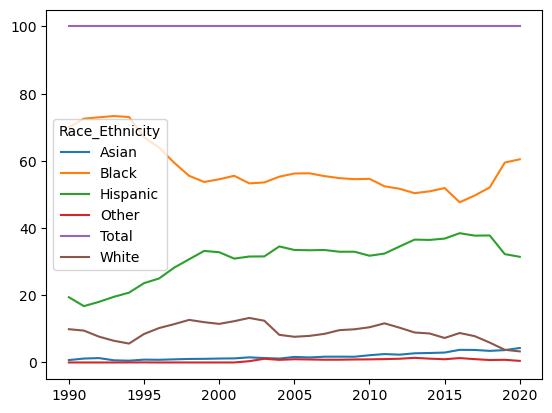

In [11]:
total_arrest[cols].T.div(total_arrest[cols].T['Total'], axis=0).mul(100).plot()

In [12]:
total_arrest[cols].T.div(total_arrest[cols].T['Total'], axis=0).mul(100)

Race_Ethnicity,Asian,Black,Hispanic,Other,Total,White
1990,0.719984,69.955244,19.420121,0.000000,100.0,9.904651
1991,1.169462,72.572816,16.769638,0.000000,100.0,9.488085
1992,1.306241,72.962886,18.038565,0.000000,100.0,7.692308
1993,0.650542,73.344454,19.549625,0.000000,100.0,6.455379
1994,0.530443,73.051199,20.779520,0.011531,100.0,5.627306
1995,0.846824,67.040266,23.611457,0.024907,100.0,8.476546
1996,0.797448,63.955343,25.001375,0.000000,100.0,10.245834
1997,0.932290,59.461831,28.202691,0.003656,100.0,11.399532
1998,1.052168,55.551693,30.721454,0.002318,100.0,12.672368
1999,1.084737,53.717152,33.202469,0.000000,100.0,11.995643


In [13]:
type(total_arrest[cols].T.div(total_arrest[cols].T['Total'], axis=0).mul(100))

pandas.core.frame.DataFrame

In [14]:
pct = total_arrest[cols].T.div(total_arrest[cols].T['Total'], axis=0).mul(100)
pct

Race_Ethnicity,Asian,Black,Hispanic,Other,Total,White
1990,0.719984,69.955244,19.420121,0.000000,100.0,9.904651
1991,1.169462,72.572816,16.769638,0.000000,100.0,9.488085
1992,1.306241,72.962886,18.038565,0.000000,100.0,7.692308
1993,0.650542,73.344454,19.549625,0.000000,100.0,6.455379
1994,0.530443,73.051199,20.779520,0.011531,100.0,5.627306
1995,0.846824,67.040266,23.611457,0.024907,100.0,8.476546
1996,0.797448,63.955343,25.001375,0.000000,100.0,10.245834
1997,0.932290,59.461831,28.202691,0.003656,100.0,11.399532
1998,1.052168,55.551693,30.721454,0.002318,100.0,12.672368
1999,1.084737,53.717152,33.202469,0.000000,100.0,11.995643


In [15]:
type(pct)

pandas.core.frame.DataFrame

In [16]:
df_exp = pd.DataFrame(pct)
df_exp

Race_Ethnicity,Asian,Black,Hispanic,Other,Total,White
1990,0.719984,69.955244,19.420121,0.000000,100.0,9.904651
1991,1.169462,72.572816,16.769638,0.000000,100.0,9.488085
1992,1.306241,72.962886,18.038565,0.000000,100.0,7.692308
1993,0.650542,73.344454,19.549625,0.000000,100.0,6.455379
1994,0.530443,73.051199,20.779520,0.011531,100.0,5.627306
1995,0.846824,67.040266,23.611457,0.024907,100.0,8.476546
1996,0.797448,63.955343,25.001375,0.000000,100.0,10.245834
1997,0.932290,59.461831,28.202691,0.003656,100.0,11.399532
1998,1.052168,55.551693,30.721454,0.002318,100.0,12.672368
1999,1.084737,53.717152,33.202469,0.000000,100.0,11.995643


In [17]:
df_exp = df_exp.T
df_exp

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Race_Ethnicity,,,,,,,,,,,,,,,,,,,,,
Asian,0.719984,1.169462,1.306241,0.650542,0.530443,0.846824,0.797448,0.932290,1.052168,1.084737,...,2.500172,2.327419,2.731280,2.824126,2.951996,3.759990,3.729708,3.452414,3.679151,4.309764
Black,69.955244,72.572816,72.962886,73.344454,73.051199,67.040266,63.955343,59.461831,55.551693,53.717152,...,52.433157,51.692183,50.393371,50.936849,51.914256,47.687672,49.684719,52.100065,59.496188,60.471380
Hispanic,19.420121,16.769638,18.038565,19.549625,20.779520,23.611457,25.001375,28.202691,30.721454,33.202469,...,32.411162,34.520530,36.566789,36.475274,36.872701,38.477663,37.753231,37.801163,32.250580,31.447811
Other,0.000000,0.000000,0.000000,0.000000,0.011531,0.024907,0.000000,0.003656,0.002318,0.000000,...,1.005224,1.110328,1.380984,1.137495,0.967346,1.305734,0.997272,0.729253,0.795492,0.471380
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
White,9.904651,9.488085,7.692308,6.455379,5.627306,8.476546,10.245834,11.399532,12.672368,11.995643,...,11.650285,10.349540,8.927575,8.626256,7.293701,8.768942,7.835070,5.917105,3.778588,3.299663


In [18]:
df_exp = df_exp.drop(df_exp.index[3:5])
df_exp

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Race_Ethnicity,,,,,,,,,,,,,,,,,,,,,
Asian,0.719984,1.169462,1.306241,0.650542,0.530443,0.846824,0.797448,0.932290,1.052168,1.084737,...,2.500172,2.327419,2.731280,2.824126,2.951996,3.759990,3.729708,3.452414,3.679151,4.309764
Black,69.955244,72.572816,72.962886,73.344454,73.051199,67.040266,63.955343,59.461831,55.551693,53.717152,...,52.433157,51.692183,50.393371,50.936849,51.914256,47.687672,49.684719,52.100065,59.496188,60.471380
Hispanic,19.420121,16.769638,18.038565,19.549625,20.779520,23.611457,25.001375,28.202691,30.721454,33.202469,...,32.411162,34.520530,36.566789,36.475274,36.872701,38.477663,37.753231,37.801163,32.250580,31.447811
White,9.904651,9.488085,7.692308,6.455379,5.627306,8.476546,10.245834,11.399532,12.672368,11.995643,...,11.650285,10.349540,8.927575,8.626256,7.293701,8.768942,7.835070,5.917105,3.778588,3.299663


In [19]:
df_exp.to_csv('data/nyc_pct_arrests.csv', encoding='utf-8')

<AxesSubplot:>

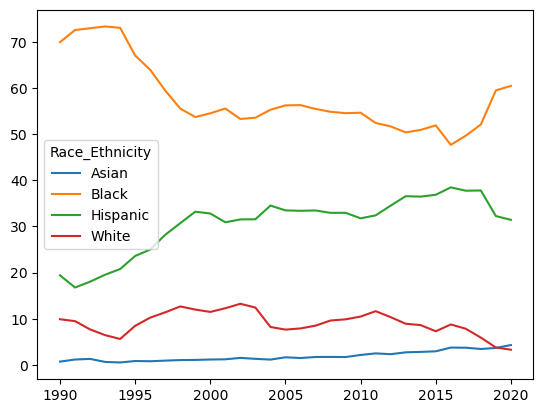

In [20]:
df_exp.T.plot()